# HAMS DATA QUALITY CHALLENGE




Welcome to the **Data Quality Report for Company X**, where we delve into the complexities of e-commerce data to identify and address potential data quality issues.

The data at hand originates from various tables within the provided SQLite database, providing a comprehensive view of the customer journey, 

conversions, costs, and backend discrepancies of Company X.

## INTRODUCTION

Company X, a prominent player in the e-commerce domain, relies on comprehensive data to optimize its operations and drive business success.

In this report, we aim to analyze the data stored in the 'challenge.db' file. Our task involves navigating through the details of e-commerce 

transactions, uncovering potential discrepancies, and gaining insights to enhance data quality. 

## OBJECTIVE

**Backend Discrepancies:**
 - Cross-reference 'conversions' with 'conversions_backend' to pinpoint any discrepancies.

 **Conversion Stability:**
 - Examine the stability of conversions over time.
 - Identify patterns or trends that may impact business decisions.

 **Attribution Consistency:**
 - Validate the consistency of attribution results.
 - Identify conversions with 'ihc' values that deviate from expectations.

**Cost Coverage:**
 - Investigate if costs in 'api_adwords_costs' are fully covered in 'session_sources.'
 - Identify any campaigns with coverage issues.
 
**Channel Stability:**
 - Assess the stability of sessions per channel over time.
 - Uncover insights into potential channeling issues.

 **Additional Data Quality issues**
 - Using EDA to find other data quality issues

## DATA QUALITY FINDINGS

### Connect to SQLite Database

In [1]:
import sqlite3

def connect_to_database(database_file):
    conn = sqlite3.connect(database_file)
    return conn

database_file = "challenge.db"
connection = connect_to_database(database_file)



### Load data into Pandas DataFrames

In [2]:
# Load 'conversions' table into DataFrame
import pandas as pd
query_conversions = "SELECT * FROM conversions"
conversions_df = pd.read_sql_query(query_conversions, connection)
conversions_df


,conv_id,user_id,conv_date,market,revenue
0,conv_id_16788,user_id_569581,2021-07-15,NL,219.73
1,conv_id_9916,user_id_62541,2021-07-15,DE,104.21
2,conv_id_8443,user_id_494266,2021-07-15,NL,55.69
3,conv_id_8107,user_id_215383,2021-07-15,NL,66.12
4,conv_id_7835,user_id_69012,2021-07-15,AT,25.71
...,...,...,...,...,...
16949,conv_id_10826,user_id_197806,2021-07-30,NL,44.96
16950,conv_id_1128,user_id_592828,2021-07-30,FR,68.33
16951,conv_id_12394,user_id_381420,2021-07-30,DE,45.71
16952,conv_id_843,user_id_786042,2021-07-30,NL,51.57


In [3]:
# Load 'conversions_backend' table into DataFrame
query_conversions_backend = "SELECT * FROM conversions_backend"
conversions_backend_df = pd.read_sql_query(query_conversions_backend, connection)
conversions_backend_df

,conv_id,user_id,conv_date,market,revenue
0,conv_id_16788,user_id_569581,2021-07-15,NL,219.73
1,conv_id_9916,user_id_62541,2021-07-15,DE,104.21
2,conv_id_8443,user_id_494266,2021-07-15,NL,55.69
3,conv_id_8107,user_id_215383,2021-07-15,NL,66.12
4,conv_id_7835,user_id_69012,2021-07-15,AT,25.71
...,...,...,...,...,...
17278,conv_id_8908,user_id_1125989,2021-07-31,GB,38.25
17279,conv_id_14002,user_id_192174,2021-07-31,GB,38.66
17280,conv_id_9233,user_id_58895,2021-07-31,GB,34.66
17281,conv_id_14567,user_id_1071138,2021-07-31,GB,78.68


In [4]:
# Load 'attribution_customer_journey' table into DataFrame
query_attribution_customer_journey = "SELECT * FROM attribution_customer_journey"
attribution_customer_journey_df = pd.read_sql_query(query_attribution_customer_journey, connection)
attribution_customer_journey_df

,conv_id,session_id,ihc
0,conv_id_12119,session_id_180406,0.000000
1,conv_id_12119,session_id_130131,0.000000
2,conv_id_12119,session_id_134444,0.000000
3,conv_id_12119,session_id_806937,0.000000
4,conv_id_12119,session_id_1042324,0.000000
...,...,...,...
22494,conv_id_12805,session_id_1238075,0.728687
22495,conv_id_12805,session_id_767372,0.000000
22496,conv_id_8908,session_id_1524330,1.000000
22497,conv_id_14567,session_id_412626,0.500000


In [5]:
# Load 'api_adwords_costs' table into DataFrame
query_api_adwords_costs = "SELECT * FROM api_adwords_costs"
api_adwords_costs_df = pd.read_sql_query(query_api_adwords_costs, connection)
api_adwords_costs_df

,event_date,campaign_id,cost,clicks
0,2021-07-04,campaign_id_149,3554.289,5256
1,2021-07-03,campaign_id_149,3021.879,6180
2,2021-07-01,campaign_id_149,2986.968,7467
3,2021-07-02,campaign_id_149,2596.872,4761
4,2021-07-28,campaign_id_149,2553.928,3479
...,...,...,...,...
2982,2021-07-13,campaign_id_59,0.080,1
2983,2021-07-12,campaign_id_21,0.060,2
2984,2021-07-02,campaign_id_144,0.050,1
2985,2021-07-13,campaign_id_21,0.050,1


In [6]:
# Load 'session_sources' table into DataFrame
query_session_sources = "SELECT * FROM session_sources"
session_sources_df = pd.read_sql_query(query_session_sources, connection)
session_sources_df


,session_id,user_id,event_date,event_time,channel_name,campaign_name,campaign_id,market,cpc
0,session_id_660241,user_id_814496,2021-07-03,05:30:20,Affiliate,campaign_name_716,notset,NL,0.018
1,session_id_9812,user_id_752875,2021-07-19,16:00:40,Affiliate,campaign_name_108,notset,FR,0.000
2,session_id_780253,user_id_156905,2021-07-31,07:50:23,Affiliate,campaign_name_741,notset,DE,0.022
3,session_id_785994,user_id_540849,2021-07-16,09:43:00,Affiliate,campaign_name_741,notset,DE,0.000
4,session_id_1240841,user_id_275214,2021-07-12,08:36:41,Affiliate,campaign_name_893,notset,NL,0.188
...,...,...,...,...,...,...,...,...,...
1616697,session_id_716348,user_id_750466,2021-07-19,23:39:25,YouTube Video Ads,campaign_name_741,campaign_id_52,GB,3.329
1616698,session_id_975602,user_id_38349,2021-07-27,20:43:16,YouTube Video Ads,campaign_name_741,campaign_id_52,GB,0.000
1616699,session_id_41911,user_id_391102,2021-07-01,18:39:03,YouTube Video Ads,campaign_name_741,campaign_id_52,GB,1.984
1616700,session_id_1301781,user_id_750466,2021-07-15,21:18:49,YouTube Video Ads,campaign_name_741,campaign_id_52,GB,5.052


In [7]:
# Close the database connection
connection.close()

### Verification of Consistency between 'conversions' and 'conversions_backend' Table

In [8]:
# Identify rows where data differs between 'conversions' and 'conversions_backend'
differences_df = pd.merge(conversions_df, conversions_backend_df, how='outer', 
                          indicator=True).loc[lambda x: x['_merge'] != 'both']
print("Differences between 'conversions' and 'conversions_backend':")
print(differences_df)


Differences between 'conversions' and 'conversions_backend':
             conv_id          user_id   conv_date market  revenue      _merge
7      conv_id_11478   user_id_758246  2021-07-15     DE     0.00   left_only
10        conv_id_87   user_id_376090  2021-07-15     FR     0.00   left_only
151    conv_id_15098    user_id_47785  2021-07-15     NL     0.00   left_only
162    conv_id_16021   user_id_173269  2021-07-15     DE     0.00   left_only
163    conv_id_12754   user_id_561494  2021-07-15     DE     0.00   left_only
...              ...              ...         ...    ...      ...         ...
17466  conv_id_14959   user_id_591188  2021-07-31     GB    41.32  right_only
17467  conv_id_15526   user_id_711735  2021-07-31     GB    35.34  right_only
17468   conv_id_1376   user_id_444912  2021-07-31     GB    38.25  right_only
17469  conv_id_10992  user_id_1014775  2021-07-31     GB    79.99  right_only
17470  conv_id_11987   user_id_594900  2021-07-31     GB    60.68  right_only

[7

> **Double check conversions ('conversions' table) with backend ('conversions_backend' table), any issues?**

Based on the output, there are differences between the 'conversions' and 'conversions_backend' tables, accounting for **705 rows** of inconsistency.

The data quality issue here is a potential inconsistency between the main 'conversions' table and the reference 'conversions_backend' table. 

This could be due to various reasons, such as:

 - **Data Ingestion Issues:** There might be issues in the data ingestion process, causing some conversions 
 
 from the backend to be missing or not properly integrated into the main 'conversions' table.

 - **Data Extraction Discrepancies:** Differences in the extraction process between the backend system 
 
 and the main database may lead to variations in the data, resulting in missing entries or discrepancies.

 - **Data Synchronization Problems:** If the two tables are supposed to mirror each other, 
 
 any delays or synchronization problems between the backend system and the main database can cause inconsistencies.

To address this data quality issue, it is crucial to investigate the root cause of the discrepancies. 
This may involve: 

 - Reviewing the data extraction and integration processes, 

 - Ensuring synchronization between systems, and 
 
 - Validating the accuracy of the data transfer. 
 
 Resolving these issues is essential to maintaining data integrity and ensuring that both 'conversions' and 'conversions_backend'
 
  tables provide consistent and reliable information.

### Temporal Stability of Conversions in the 'conversions' Table

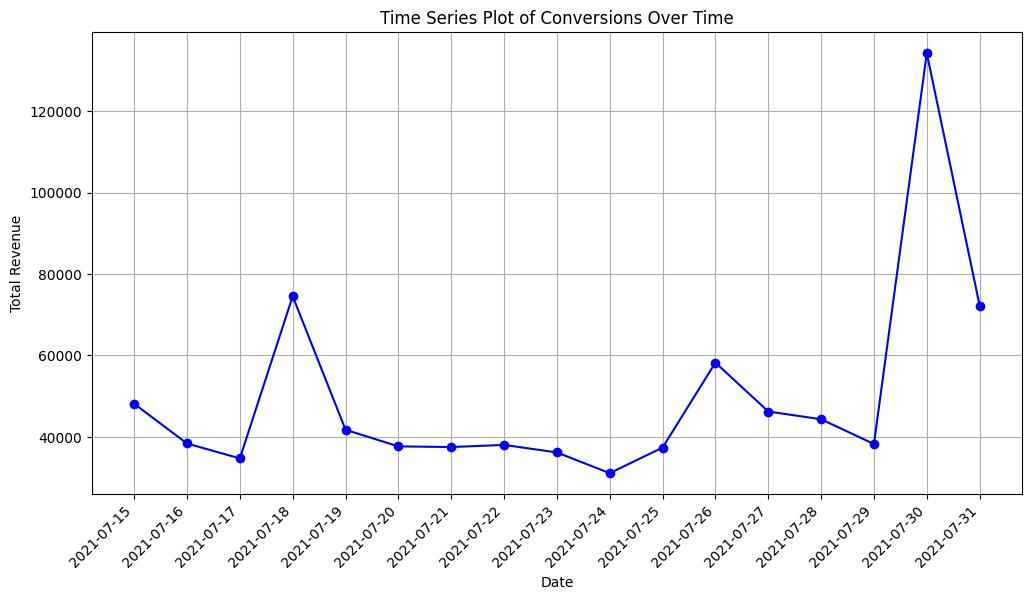

In [29]:
import matplotlib.pyplot as plt

# Group by 'conv_date' and calculate the total revenue or count of conversions for each date
time_series_data = conversions_df.groupby('conv_date')['revenue'].sum()  

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data.values, marker='o', linestyle='-', color='b')
plt.title('Time Series Plot of Conversions Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue') 

# Rotate x-axis tick labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.show()



> **Are the conversions in the 'conversions' table stable over time? Any pattern?**

**Overall Trend:**

 - There seems to be a general trend of fluctuating conversion values over the specified time period.
 - There is a noticeable spike in conversions on '2021-07-30' with significantly higher revenue compared to other days.

**Daily Fluctuations:**

 - Daily revenue values vary, indicating some level of instability or variability.
 - Some days exhibit higher conversion values, while others have lower values.

**Specific Events:**

 - '2021-07-30' stands out as a day with exceptionally high revenue, suggesting a specific event or 
 
 promotion might have driven increased conversions on that day.

**Recommendations:**

 - Further investigation is needed to understand the factors contributing to the spike on '2021-07-30'.

 - Identify any marketing campaigns, promotions, or external events that may have influenced this surge in conversions.
 
 - Consider conducting a longer-term analysis to identify any recurring patterns or trends over a broader timeframe.

 

While there is a noticeable fluctuation in daily conversions, the specific pattern and stability may vary based on external factors influencing user behavior. 


### Consistency and Integrity of Attribution Results ('ihc' Values) in Customer Journey Table

In [53]:
# Sum 'ihc' values for each 'conv_id'
sum_ihc_by_conv_id = attribution_customer_journey_df.groupby('conv_id')['ihc'].sum()

# Display the result
print("Sum of 'ihc' values for each 'conv_id':")
print(sum_ihc_by_conv_id)


Sum of 'ihc' values for each 'conv_id':
conv_id
conv_id_1        1.0
conv_id_10       1.0
conv_id_100      1.0
conv_id_1000     1.0
conv_id_10002    1.0
                ... 
conv_id_9992     1.0
conv_id_9994     1.0
conv_id_9995     1.0
conv_id_9998     1.0
conv_id_9999     1.0
Name: ihc, Length: 7000, dtype: float64


In [64]:
# Check if all sum values are equal to 1
all_ihc_equal_to_1 = sum_ihc_by_conv_id.eq(1).all()

In [65]:
# 'conv_id' entries where the sum of 'ihc' is not equal to 1
conv_ids_with_inconsistent_ihc = sum_ihc_by_conv_id[~sum_ihc_by_conv_id.eq(1)].index
conv_ids_with_inconsistent_ihc_values = attribution_customer_journey_df[attribution_customer_journey_df['conv_id'].isin(conv_ids_with_inconsistent_ihc)][['conv_id', 'ihc']]

In [66]:
# Display the results
print("Are all 'ihc' values equal to 1 for all 'conv_id':", all_ihc_equal_to_1)
print("\n'conv_id' entries where the sum of 'ihc' is not equal to 1:")
print(conv_ids_with_inconsistent_ihc)
print("\n'conv_id' entries and their 'ihc' values:")
print(conv_ids_with_inconsistent_ihc_values)

Are all 'ihc' values equal to 1 for all 'conv_id': False

'conv_id' entries where the sum of 'ihc' is not equal to 1:
Index(['conv_id_10', 'conv_id_10006', 'conv_id_10007', 'conv_id_10021',
       'conv_id_10022', 'conv_id_10031', 'conv_id_10034', 'conv_id_10048',
       'conv_id_10056', 'conv_id_10059',
       ...
       'conv_id_9900', 'conv_id_9912', 'conv_id_992', 'conv_id_9929',
       'conv_id_9936', 'conv_id_994', 'conv_id_9955', 'conv_id_9980',
       'conv_id_999', 'conv_id_9999'],
      dtype='object', name='conv_id', length=1792)

'conv_id' entries and their 'ihc' values:
             conv_id       ihc
0      conv_id_12119  0.000000
1      conv_id_12119  0.000000
2      conv_id_12119  0.000000
3      conv_id_12119  0.000000
4      conv_id_12119  0.000000
...              ...       ...
22491  conv_id_12805  0.000000
22492  conv_id_12805  0.000000
22493  conv_id_12805  0.000000
22494  conv_id_12805  0.728687
22495  conv_id_12805  0.000000

[11457 rows x 2 columns]


> **Are attribution results consistent? Do you find any conversions where the 'ihc' values don't make sense?**

The analysis of attribution results in the 'attribution_customer_journey' table reveals significant data quality issues, 

impacting the reliability of insights into customer journeys and conversion attribution. 

**Findings:**

 - **Inconsistent 'ihc' Values:** Multiple 'conv_id' entries (conv_id' entries where the sum of 'ihc' is not equal to 1), 
 
 exhibit inconsistency in 'ihc' values, indicating a discrepancy in the contribution of individual sessions to the overall customer journey


**Implications**

 - This inconsistency raises concerns about the accuracy of attributing conversions to specific sessions, 
 
 potentially affecting the assessment of marketing channel effectiveness.

 - Decision-making processes relying on inaccurate attribution information may lead to 
 
 suboptimal strategies for marketing channel optimization.

**Recommendations**

 - Investigate and address the root causes of inconsistent 'ihc' values, ensuring that attribution accurately reflects the contribution of each session.

Addressing these data quality issues is essential for enhancing the robustness of attribution analysis, 

providing stakeholders with trustworthy insights into customer journeys, and optimizing marketing strategies effectively.

### Analyzing Coverage of Costs from 'api_adwords_costs' Table in 'session_sources' Table 
### and Identifying Campaigns with Issues

In [103]:
# Check for unique campaigns in both tables
unique_campaigns_api = set(api_adwords_costs_df['campaign_id'].unique())
unique_campaigns_session = set(session_sources_df['campaign_id'].unique())

In [104]:
# Identify campaigns in 'api_adwords_costs' without corresponding entries in 'session_sources'
missing_campaigns = unique_campaigns_api - unique_campaigns_session


In [106]:
# Analyze the coverage of costs for each campaign
for campaign_id in missing_campaigns:
    # Extract relevant rows from 'api_adwords_costs' for the missing campaign
    missing_campaign_data = api_adwords_costs_df[api_adwords_costs_df['campaign_id'] == campaign_id]
    
    # Display information about the missing campaign
    print(f"\nCampaign ID: {campaign_id}")
    print("Missing entries in 'session_sources' for the following dates:")
    print(missing_campaign_data[['event_date', 'cost']])


Campaign ID: campaign_id_121
Missing entries in 'session_sources' for the following dates:
      event_date  cost
2094  2021-07-30  9.71
2161  2021-07-31  8.75
2177  2021-07-29  8.54
2195  2021-07-02  8.39
2202  2021-07-03  8.33
2235  2021-07-20  7.96
2238  2021-07-10  7.95
2250  2021-07-18  7.81
2268  2021-07-16  7.53
2269  2021-07-26  7.53
2321  2021-07-04  6.85
2326  2021-07-25  6.80
2334  2021-07-27  6.70
2372  2021-07-06  6.31
2379  2021-07-12  6.27
2425  2021-07-19  5.83
2437  2021-07-28  5.72
2457  2021-07-21  5.42
2477  2021-07-05  5.21
2479  2021-07-07  5.17
2499  2021-07-15  4.99
2538  2021-07-11  4.56
2553  2021-07-08  4.42
2667  2021-07-09  3.13
2672  2021-07-17  3.07
2737  2021-07-22  2.41
2742  2021-07-14  2.35
2747  2021-07-01  2.25
2793  2021-07-23  1.85
2808  2021-07-13  1.74
2870  2021-07-24  1.28

Campaign ID: campaign_id_97
Missing entries in 'session_sources' for the following dates:
      event_date   cost
1735  2021-07-26  18.56
1755  2021-07-22  17.74
1815  202

In [102]:
#check for campaigns in 'session_sources' without corresponding entries in 'api_adwords_costs'
missing_campaigns_session = unique_campaigns_session - unique_campaigns_api
for campaign_id in missing_campaigns_session:
         missing_campaign_data_session = session_sources_df[session_sources_df['campaign_id'] == campaign_id]
         print(f"\nCampaign ID: {campaign_id}")
         print("Missing entries in 'api_adwords_costs' for the following dates:")
         print(missing_campaign_data_session[['event_date', 'cpc']])



Campaign ID: campaign_id_40
Missing entries in 'api_adwords_costs' for the following dates:
        event_date  cpc
505131  2021-07-06  0.0
517683  2021-07-07  0.0
517684  2021-07-15  0.0
524314  2021-07-06  0.0
527479  2021-07-13  0.0
527884  2021-07-18  0.0
531553  2021-07-24  0.0
537477  2021-07-21  0.0
540528  2021-07-22  0.0
540529  2021-07-28  0.0
547917  2021-07-01  0.0
547918  2021-07-05  0.0
547919  2021-07-25  0.0
547920  2021-07-27  0.0

Campaign ID: campaign_id_72
Missing entries in 'api_adwords_costs' for the following dates:
         event_date  cpc
1611789  2021-07-24  0.0
1612317  2021-07-02  0.0
1612766  2021-07-11  0.0
1613451  2021-07-30  0.0
1615453  2021-07-09  0.0
1615588  2021-07-15  0.0
1616487  2021-07-30  0.0

Campaign ID: campaign_id_62
Missing entries in 'api_adwords_costs' for the following dates:
        event_date  cpc
694445  2021-07-06  0.0
699770  2021-07-03  0.0

Campaign ID: campaign_id_8
Missing entries in 'api_adwords_costs' for the following date

>**Are the costs in the 'api_adwords_costs' table fully covered in the 'session_sources' table? Any campaigns where you see issues?**

Based on the provided information, it appears that the costs in the 'api_adwords_costs' table 

are not fully covered in the 'session_sources' table. 

There are missing entries for various campaign IDs and dates in the 'api_adwords_costs' table, 

as indicated by cost values being recorded as 0.0 on those dates. 

This indicates a data quality issue. 

#### Data Quality Issues: 

**Incomplete Data in 'api_adwords_costs' Table:**

 - The 'api_adwords_costs' table has missing cost entries for several campaigns and dates,

     as mentioned in the previous response. 
 
 - This incomplete data affects the accuracy and reliability of cost-related metrics.

**Mismatch Between Tables:**

 - There are discrepancies between the 'api_adwords_costs' and 'session_sources' tables, 

  as not all costs from 'api_adwords_costs' are reflected in 'session_sources.'

 -  This inconsistency can lead to inaccuracies in analytics and reporting.

**Potential Data Synchronization Issues:**

 - The missing entries might be a result of data synchronization issues between different 

   data sources or pipelines. It's crucial to investigate and address these synchronization gaps to ensure data integrity.

**Impact on Decision-Making:**

 - Incomplete cost data can impact decision-making processes, especially in marketing analysis and budget allocation.

 - Decision-makers rely on accurate and comprehensive data to make informed choices, 
 
 and incomplete cost information may lead to suboptimal decisions.

#### Recommendations:

**Data Quality Monitoring:**

 - Implement a robust data quality monitoring system to regularly check for missing or incomplete entries in tables.

 - Automated alerts can notify data professionals of any anomalies for prompt investigation.

**Synchronize Data Sources:**

 - Ensure that data synchronization processes between different sources, 

    such as ad platforms and session tracking systems, are well-maintained. 

 - Schedule regular checks to identify and resolve any discrepancies.

**Error Handling Mechanism:**

 - Enhance error handling mechanisms in data pipelines to capture and log any issues during 

  data extraction, transformation, and loading (ETL) processes. 

 - This will aid in identifying the root cause of missing data.

**Documentation and Metadata**

 - Maintain comprehensive documentation and metadata for the data pipelines, including information about data sources, 

  extraction methods, and update schedules. 

 - This documentation can assist in troubleshooting and understanding data flow.

**Regular Audits and Reviews:**

 - Conduct regular audits of the data to identify and rectify any inconsistencies. 

 - Periodic reviews of data quality and completeness should be part of the data governance strategy.

**Communication Across Teams:**

 - Foster communication between teams responsible for managing different data sources. 

 - Collaboration between marketing, IT, and data teams is essential to address data quality issues effectively.

**Historical Data Backfill:**

 - Consider backfilling historical data for missing entries, if possible. 

 - This can help in maintaining a consistent and complete dataset for historical analysis.




Addressing these should contribute to improving the overall data quality and reliability of  cost-related metrics, ensuring accurate information for analysis and strategic planning.

### Assessing Stability and Distribution of Sessions Across Channels Over Time

<Figure size 1200x600 with 0 Axes>

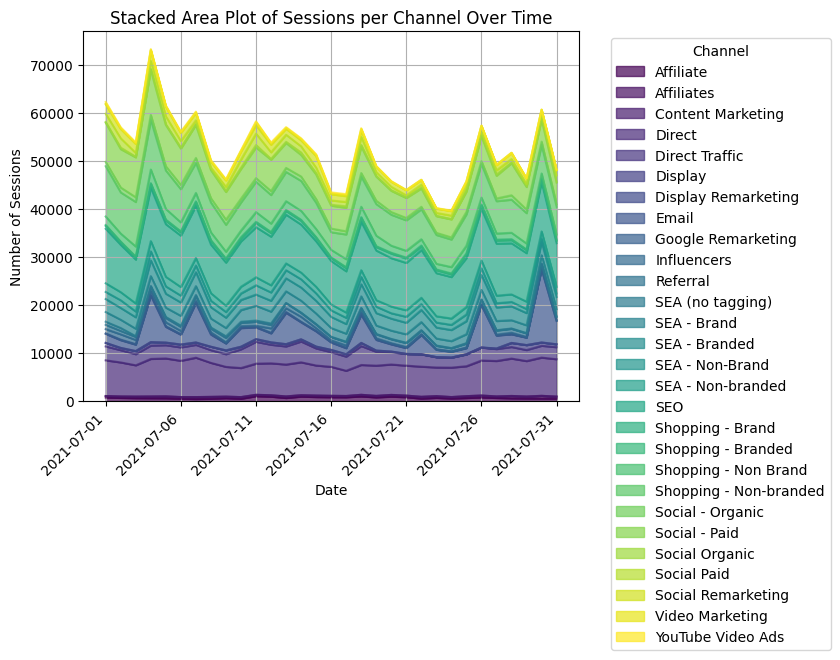

In [28]:
# Pivot the data to get sessions per channel per date
pivot_data = session_sources_df.pivot_table(index='event_date', columns='channel_name', aggfunc='size', fill_value=0)

# Plot a stacked area plot
plt.figure(figsize=(12, 6))
ax = pivot_data.plot.area(stacked=True, colormap='viridis', alpha=0.7)

plt.title('Stacked Area Plot of Sessions per Channel Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis tick labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.show()


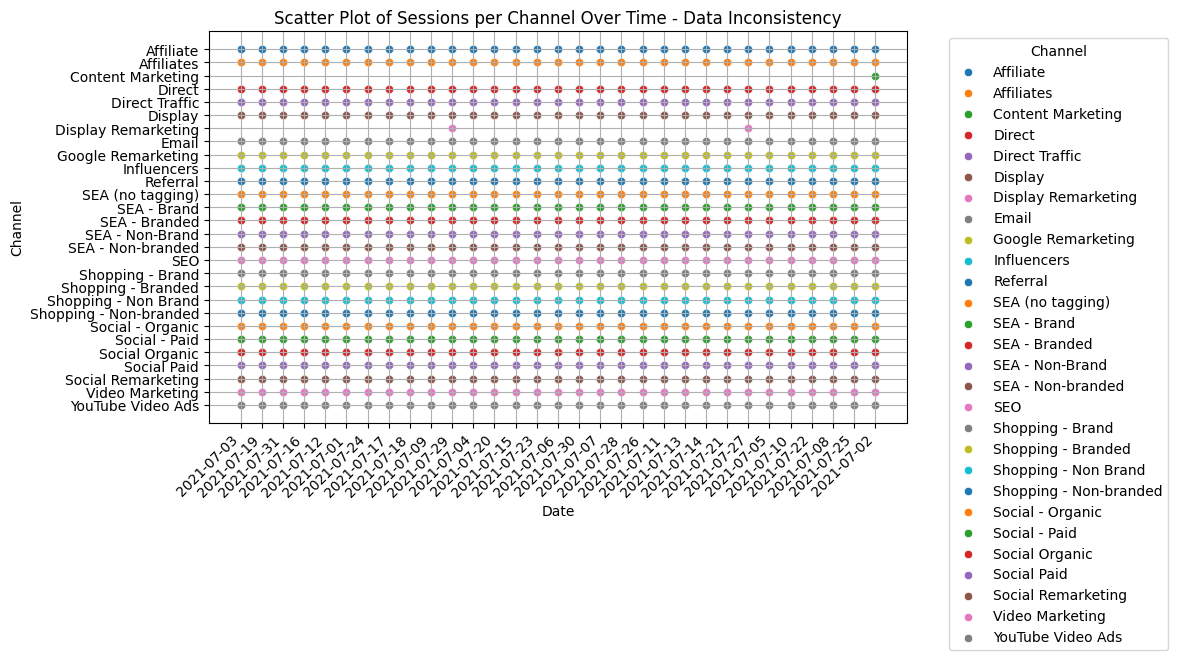

In [18]:
# Create a scatter plot for potential data inconsistency for all channels
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = plt.gca()  # Get the current Axes instance

# Add scatter plot for potential data inconsistency for all channels
for channel in session_sources_df['channel_name'].unique():
    sns.scatterplot(data=session_sources_df[session_sources_df['channel_name'] == channel], x='event_date', y='channel_name', label=channel, ax=ax)

plt.title('Scatter Plot of Sessions per Channel Over Time - Data Inconsistency')
plt.xlabel('Date')
plt.ylabel('Channel')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize x-axis ticks to avoid overlapping
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.grid(True)
plt.show()


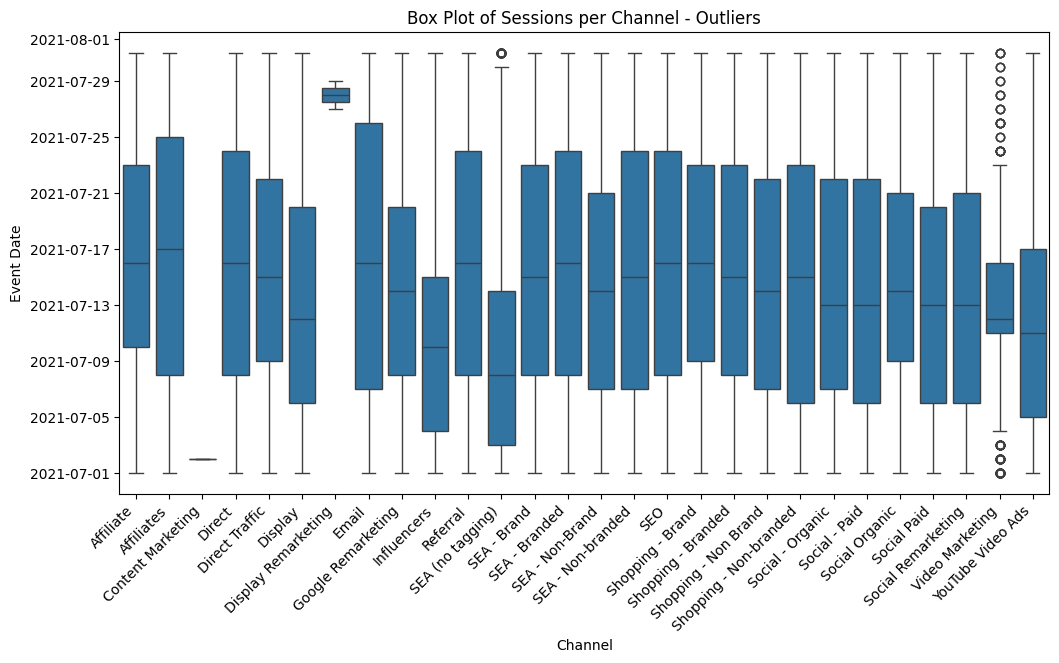

In [40]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a box plot for each channel with outliers displayed as individual points
sns.boxplot(data=session_sources_df, x='channel_name', y='event_date', showfliers=True)

# Set plot labels and title
plt.title('Box Plot of Sessions per Channel - Outliers')
plt.xlabel('Channel')
plt.ylabel('Event Date')
plt.xticks(rotation=45, ha='right')  

# Show the plot
plt.show()

**Findings:**

 - **Outliers:** identified significant outliers in channels such as, SEA(no tagging) and Video Marketing. 
 - **Data Inconsistency:** Variability is observed in channels like "content marketing","display re-marketing" indicating potential data inconsistency.
 - **Inconsistent Channel Labeling:** Inconsistencies are noted in channel labeling, exemplified by variations like "Affiliate" and "Affiliates."


**Implications:**

 - Outliers can skew data interpretation and affect the overall reliability of insights.
 - Inconsistent data challenges the accuracy of trend analysis and hinders reliable decision-making.
 - Inconsistent labeling hampers the clarity and comparability of data across channels.

**Recommendations:**

 - Investigate and address outliers in channels by implementing automated detection and regular review protocols.
 - Enhance data consistency through documented best practices, regular monitoring, and standardized reporting processes.
 - Establish a standardized channel labeling framework, provide guidelines, and conduct regular audits for accurate and consistent classification.

 The no of sessions per channel is not stable over time for the channels, content marketing and display re-marketing. 
 
 Addressing the identified data quality issues contributes significantly to enhancing the reliability and integrity of the dataset.

### Additional Data Quality Concerns

> **Any other issues?**

### Ensuring Consistency in Conversion Identifiers Across Tables for Robust Data Alignment

In [98]:
# Extract conv_id ranges from each table
conversions_conv_id_range = set(conversions_df['conv_id'])
conversions_backend_conv_id_range = set(conversions_backend_df['conv_id'])
attribution_customer_journey_conv_id_range = set(attribution_customer_journey_df['conv_id'])


# Display the conv_id ranges
print("Conversions Conv_ID Range:", len(conversions_conv_id_range))
print("Conversions Backend Conv_ID Range:", len(conversions_backend_conv_id_range))
print("Attribution Customer Journey Conv_ID Range:", len(attribution_customer_journey_conv_id_range))

# Check for consistency
conv_id_ranges = [conversions_conv_id_range, conversions_backend_conv_id_range, 
                  attribution_customer_journey_conv_id_range]

consistent_conv_id_ranges = all(conv_id_range == conv_id_ranges[0] for conv_id_range in conv_id_ranges[1:])

# Display result
if consistent_conv_id_ranges:
    print("Conv_ID ranges across all tables are consistent.")
else:
    print("Inconsistent Conv_ID ranges detected. Further investigation is needed.")



Conversions Conv_ID Range: 16938
Conversions Backend Conv_ID Range: 17283
Attribution Customer Journey Conv_ID Range: 7000
Inconsistent Conv_ID ranges detected. Further investigation is needed.


In [99]:
# Identify specific conv_id values that are unique to each table
unique_conv_ids = {
    'conversions': conversions_conv_id_range,
    'conversions_backend': conversions_backend_conv_id_range,
    'attribution_customer_journey': attribution_customer_journey_conv_id_range,
}

# Identify common conv_id values
common_conv_ids = set.intersection(*unique_conv_ids.values())

# Identify inconsistent conv_id values
inconsistent_conv_ids = set.union(*unique_conv_ids.values()) - common_conv_ids

# Display the results
print("Common Conv_ID Values:", len(common_conv_ids))
print("Inconsistent Conv_ID Values:", len(inconsistent_conv_ids))

# Example: Display the first 10 inconsistent conv_id values
print("Example of Inconsistent Conv_ID Values:", list(inconsistent_conv_ids)[:10])


Common Conv_ID Values: 6862
Inconsistent Conv_ID Values: 10421
Example of Inconsistent Conv_ID Values: ['conv_id_8660', 'conv_id_5995', 'conv_id_5421', 'conv_id_349', 'conv_id_8123', 'conv_id_6062', 'conv_id_11264', 'conv_id_11463', 'conv_id_7105', 'conv_id_2997']


 - The common 'conv_id' values are shared among different datasets,
 
  indicating that the identification or tracking of conversions using these 'conv_id' values is consistent across those datasets.
 - There are 10421 inconsistent conv_id values, exemplified by entries like 'conv_id_5995', 'conv_id_5421', and others. 

 - These inconsistencies across tables such as 'conversions', 'conversions_backend', 'attribution_customer_journey', 'api_adwords_costs', and 'session_sources' may lead to challenges in data alignment and hinder the accuracy of analyses involving these conversion identifiers. Resolving these discrepancies is crucial for maintaining data integrity and ensuring a reliable foundation for downstream analyses and decision-making processes. 

 - It is recommended to investigate the root causes of these inconsistencies and implement measures to align the conv_id values across the relevant tables.

### Campaign_ID Consistency Across Tables

#####  "The campaign_id in api_adwords_costs_df links to the campaign_id in the 'session_sources' table."

In [97]:
# Extract unique 'campaign_id' values from 'api_adwords_costs_df'
api_adwords_costs_campaign_ids = set(api_adwords_costs_df['campaign_id'].unique())

# Extract unique 'campaign_id' values from 'session_sources_df'
session_sources_campaign_ids = set(session_sources_df['campaign_id'].unique())

# Identify inconsistent 'campaign_id' values
inconsistent_campaign_ids = api_adwords_costs_campaign_ids.symmetric_difference(session_sources_campaign_ids)

# Display the inconsistent 'campaign_id' values
print("Inconsistent Campaign IDs:", inconsistent_campaign_ids)


Inconsistent Campaign IDs: {'campaign_id_40', 'campaign_id_121', 'campaign_id_81', 'campaign_id_109', 'campaign_id_145', 'campaign_id_131', 'campaign_id_90', 'campaign_id_1', 'campaign_id_162', 'campaign_id_123', 'campaign_id_105', 'campaign_id_129', 'campaign_id_104', 'campaign_id_36', 'campaign_id_112', 'campaign_id_31', 'campaign_id_139', 'campaign_id_120', 'campaign_id_102', 'campaign_id_98', 'campaign_id_151', 'campaign_id_87', 'campaign_id_23', 'campaign_id_16', 'campaign_id_97', 'campaign_id_164', 'campaign_id_165', 'campaign_id_136', 'campaign_id_11', 'campaign_id_62', 'campaign_id_8', 'campaign_id_119', 'campaign_id_88', 'notset', 'campaign_id_124', 'campaign_id_128', 'campaign_id_38', 'campaign_id_159', 'campaign_id_115', 'campaign_id_85', 'campaign_id_34', 'campaign_id_108', 'campaign_id_76', 'campaign_id_117', 'campaign_id_161', 'campaign_id_39', 'campaign_id_72', 'campaign_id_46', 'campaign_id_33', 'campaign_id_47', 'campaign_id_20', 'campaign_id_125', 'campaign_id_152', '

The result indicates inconsistencies in the 'campaign_id' column across different tables, 

specifically in the campaigns identified by the following IDs: 'campaign_id_40', 'campaign_id_121', 'campaign_id_81', and several others. 

- These inconsistent campaign IDs were identified in both the 'api_adwords_costs_df' and 'session_sources_df' tables. Such discrepancies can pose challenges in tracking and analyzing campaign performance accurately. 

- The presence of 'notset' in the list suggests a potential issue with missing or undefined campaign IDs.

-  To ensure a reliable and cohesive analysis of campaign-related data, it is crucial to investigate and resolve these inconsistencies. This may involve cross-referencing with authoritative sources or establishing a standardized approach to campaign ID assignment and tracking across different datasets.

### Optimizing Temporal Data Consistency for Comprehensive Analysis

In [80]:
# Extract minimum and maximum dates from 'conversions' table
conversions_min_date = conversions_df['conv_date'].min()
conversions_max_date = conversions_df['conv_date'].max()

# Extract minimum and maximum dates from 'conversions_backend' table
conversions_backend_min_date = conversions_backend_df['conv_date'].min()
conversions_backend_max_date = conversions_backend_df['conv_date'].max()

# Extract minimum and maximum dates from 'session_sources' table
session_sources_min_date = session_sources_df['event_date'].min()
session_sources_max_date = session_sources_df['event_date'].max()

# Extract minimum and maximum dates from 'api_adwords_costs' table
api_adwords_costs_min_date = api_adwords_costs_df['event_date'].min()
api_adwords_costs_max_date = api_adwords_costs_df['event_date'].max()

# Display the date ranges for each table
print("Date Range in 'conversions' table:", conversions_min_date, "to", conversions_max_date)
print("Date Range in 'conversions_backend' table:", conversions_backend_min_date, "to", conversions_backend_max_date)
print("Date Range in 'session_sources' table:", session_sources_min_date, "to", session_sources_max_date)
print("Date Range in 'api_adwords_costs' table:", api_adwords_costs_min_date, "to", api_adwords_costs_max_date)


Date Range in 'conversions' table: 2021-07-15 to 2021-07-31
Date Range in 'conversions_backend' table: 2021-07-15 to 2021-07-31
Date Range in 'session_sources' table: 2021-07-01 00:00:00 to 2021-07-31 00:00:00
Date Range in 'api_adwords_costs' table: 2021-07-01 to 2021-07-31


 - 'conversions' and 'conversions_backend' tables have the same date range, which is good for consistency.

 - 'session_sources' and 'api_adwords_costs' tables have date ranges that extend beyond the date range of 'conversions' and 'conversions_backend.' 
 
 - Aligning these date ranges would help in performing analyses that involve data from all these tables for the specified time period.

 - The 'session_sources' table contains dates in date-time format, and it's essential to ensure consistent date formats across all tables. 
 This consistency in date formatting facilitates seamless integration and analysis of data from different tables, 
 preventing potential issues related to date-related operations and comparisons.

 - Ensuring consistency in date ranges across tables is crucial for accurate time-based analyses, 
as it allows you to make meaningful comparisons and correlations between data points across different datasets.




### Market Label Consistency Analysis 

We examine the consistency of market labels across different tables—specifically, 'Conversions,' 'Conversions Backend,' and 'Session Sources.' 

The investigation reveals variations in market labels within the 'Session Sources' table, signaling potential data quality issues. 

In [94]:
# Extract unique 'market' labels from 'conversions' table
conversions_market_labels = set(conversions_df['market'].unique())

# Extract unique 'market' labels from 'conversions_backend' table
conversions_backend_market_labels = set(conversions_backend_df['market'].unique())

# Extract unique 'market' labels from 'session_sources' table
session_sources_market_labels = set(session_sources_df['market'].unique())

# Identify unique 'market' labels that are inconsistent across tables
inconsistent_market_labels = (conversions_market_labels.union(conversions_backend_market_labels, session_sources_market_labels) -
                              conversions_market_labels.intersection(conversions_backend_market_labels, session_sources_market_labels))



In [95]:
# Create a DataFrame for inconsistent market labels
inconsistent_market_df = pd.DataFrame({
    'Market Label': list(inconsistent_market_labels),
    'In Conversions': [label in conversions_market_labels for label in inconsistent_market_labels],
    'In Conversions Backend': [label in conversions_backend_market_labels for label in inconsistent_market_labels],
    'In Session Sources': [label in session_sources_market_labels for label in inconsistent_market_labels],
})

# Display the DataFrame
print("Inconsistent Market Labels:")
print(inconsistent_market_df)


Inconsistent Market Labels:
   Market Label  In Conversions  In Conversions Backend  In Session Sources
0            LV            True                    True               False
1            PL            True                    True               False
2            EE            True                    True               False
3            PT            True                    True               False
4            SI            True                    True               False
5            CZ            True                    True               False
6            BE            True                    True               False
7            BG            True                    True               False
8            HU            True                    True               False
9            SK            True                    True               False
10           IE            True                    True               False
11           AT            True                    True     

The output on "Inconsistent Market Labels" reveals inconsistencies in market labels across different tables. 

Each row represents a unique market label, and the columns indicate whether the label is consistent across specific tables

 - ('True' if consistent, 'False' if inconsistent).

**Interpretation:**

 - Market Labels Consistency in 'Conversions' and 'Conversions Backend':

 - For markets like LV, PL, EE, PT, SI, CZ, BE, BG, HU, SK, IE, AT, MT, LT, IT, HR, ES, CY, SE, GR, FI, LU, the labels are consistent between the 'Conversions' and 'Conversions Backend' tables.

**Market Labels Inconsistency in 'Session Sources':**

 - In the 'Session Sources' table, the market labels are inconsistent for all the mentioned markets. This inconsistency can be a data quality issue, possibly due to differences in data entry, categorization, or data integration processes.
Potential Solutions:

**Investigation:**

 - Explore the data in the 'Session Sources' table to identify and rectify the inconsistencies in market labels. Check for discrepancies in data sources or processes that might lead to these inconsistencies.
Standardization: 

 - Establish standardized market labeling conventions across all tables to ensure consistency. This may involve updating data in the 'Session Sources' table to match the labeling conventions used in 'Conversions' and 'Conversions Backend.'

**Data Integration:** 

- Review the data integration processes to ensure that market labels are properly synchronized during data integration or transformation steps.
Addressing these issues will enhance the overall data quality and reliability of analyses that involve market-specific insights.







### Incomplete Attribution Customer Journey Entries in 'attribution_customer_journey_df'


In [119]:
# Check for missing entries in 'attribution_customer_journey_df'
missing_entries = conversions_df[~conversions_df['conv_id'].isin(attribution_customer_journey_df['conv_id'])]

# Display missing entries, if any

if not missing_entries.empty:
    print("Conversions with missing entries in 'attribution_customer_journey_df':")
    print(missing_entries[['conv_id']])
else:
    print("All conversions have corresponding entries in 'attribution_customer_journey_df'.")


Conversions with missing entries in 'attribution_customer_journey_df':
             conv_id
0      conv_id_16788
3       conv_id_8107
10        conv_id_87
13      conv_id_3026
17      conv_id_4935
...              ...
16947  conv_id_12408
16948  conv_id_11991
16951  conv_id_12394
16952    conv_id_843
16953   conv_id_1675

[10087 rows x 1 columns]


**Missing Conversions in 'attribution_customer_journey_df':**

- Some conversions in the 'conversions_df' table do not have corresponding entries in the 'attribution_customer_journey_df' table.
- Incomplete customer journey data may lead to inaccuracies in attribution analysis, affecting the understanding of 
touchpoints and channels that contributed to conversions.


**Implications**

 - The missing entries indicate a lack of complete information about the customer journey for these conversions. Attribution analysis relies on understanding the entire customer journey, and any gaps can lead to inaccurate insights.

 -  Attribution metrics play a crucial role in marketing strategy. Inaccurate attribution may result in misallocated marketing budgets, ineffective campaigns, and missed opportunities.


**Recommendations**

 -  Conduct a detailed investigation into why certain conversions are not present in the 'attribution_customer_journey_df' table. Identifying the root cause helps in addressing the issue at its source, whether it's data entry errors, extraction problems, or discrepancies in recording customer journeys.

 - Update the 'attribution_customer_journey_df' table to include missing entries corresponding to conversions in 'conversions_df.' Ensuring that all conversions have associated customer journey information is essential for accurate attribution analysis.

 - Implement data entry validation checks to prevent future instances of missing entries. Proactive measures can help maintain data integrity and prevent similar issues in subsequent data entries.